<h1 style="color:blue"><center>Introduction To Data Science</center></h1>

<h3 style="color:black"><center> New York Citi Bike Trips </center></h3>
<br>
<p>Data Set : https://s3.amazonaws.com/tripdata/index.html </p>

Citi Bike is a bike sharing service available in New York City, that permits easy and affordable bike trips. They regularly release data about such trips, including starting and ending stations, starting and ending time, duration of the trip and few others variables. 

Let's take a look at our data!

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import numpy as np

In [2]:
citi_data = pd.read_csv('./citi_bike_aug.csv')
citi_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


We seem to have some null values in the data.

In [3]:
citi_data.shape

(1977177, 15)

In [4]:
column_names = {"start station id":"origin_id","start station name":"origin",
                                     "start station latitude":"origin_latitude",
                                     "start station longitude":"origin_longitude","end station id":"dest_id",
                                    "end station latitude":"dest_latitude","end station name":"destination",
                                    "end station longitude":"dest_longitude", "birth year":"birth_year"}

In [5]:
citi_data.rename(index = str, columns = column_names, inplace = True)
citi_data.tail()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
1977172,592,2018-08-31 23:59:27.6530,2018-09-01 00:09:20.5800,2003.0,1 Ave & E 18 St,40.733812,-73.980544,518.0,E 39 St & 2 Ave,40.747804,-73.973442,33086,Subscriber,1996,1
1977173,451,2018-08-31 23:59:42.8400,2018-09-01 00:07:14.5330,249.0,Harrison St & Hudson St,40.718710,-74.009001,2008.0,Little West St & 1 Pl,40.705693,-74.016777,33066,Subscriber,1960,1
1977174,472,2018-08-31 23:59:48.5310,2018-09-01 00:07:41.0410,450.0,W 49 St & 8 Ave,40.762272,-73.987882,281.0,Grand Army Plaza & Central Park S,40.764397,-73.973715,28711,Subscriber,1966,1
1977175,1239,2018-08-31 23:59:50.7620,2018-09-01 00:20:30.4570,3107.0,Bedford Ave & Nassau Ave,40.723117,-73.952123,372.0,Franklin Ave & Myrtle Ave,40.694546,-73.958014,33935,Subscriber,1984,1
1977176,738,2018-08-31 23:59:55.7330,2018-09-01 00:12:14.0300,504.0,1 Ave & E 16 St,40.732219,-73.981656,3660.0,W 16 St & 8 Ave,40.741022,-74.001385,28440,Subscriber,1970,1


#### Investigating Null Values

In [6]:
citi_data.isnull().any()

tripduration        False
starttime           False
stoptime            False
origin_id            True
origin               True
origin_latitude     False
origin_longitude    False
dest_id              True
destination          True
dest_latitude       False
dest_longitude      False
bikeid              False
usertype            False
birth_year          False
gender              False
dtype: bool

In [7]:
citi_data[citi_data.origin_id.isnull()]

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
875757,2544,2018-08-15 11:31:37.8670,2018-08-15 12:14:02.1290,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34426,Subscriber,1971,2
875936,2004,2018-08-15 11:35:26.0140,2018-08-15 12:08:50.0360,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.887,34428,Subscriber,1976,2
877673,213,2018-08-15 12:10:37.4360,2018-08-15 12:14:11.2920,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34428,Subscriber,1976,2
877907,602,2018-08-15 12:15:17.3330,2018-08-15 12:25:19.7620,NaN,NaN,40.845,-73.902,NaN,NaN,40.857,-73.890,34525,Subscriber,1988,1
879270,511502,2018-08-15 12:41:41.9690,2018-08-21 10:46:44.6440,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34548,Subscriber,1986,1
879953,3471,2018-08-15 12:53:40.8170,2018-08-15 13:51:32.0090,NaN,NaN,40.857,-73.890,NaN,NaN,40.845,-73.896,34501,Subscriber,1993,1
880009,3108,2018-08-15 12:54:48.0290,2018-08-15 13:46:36.7560,NaN,NaN,40.854,-73.890,NaN,NaN,40.845,-73.893,34518,Subscriber,1989,2
883455,1738,2018-08-15 13:58:46.2120,2018-08-15 14:27:45.1730,NaN,NaN,40.845,-73.893,NaN,NaN,40.839,-73.878,34518,Subscriber,1989,2
883515,644,2018-08-15 13:59:50.3310,2018-08-15 14:10:34.8660,NaN,NaN,40.845,-73.893,NaN,NaN,40.842,-73.884,34501,Subscriber,1993,1
884650,443,2018-08-15 14:20:31.5860,2018-08-15 14:27:54.9440,NaN,NaN,40.842,-73.884,NaN,NaN,40.839,-73.878,34501,Subscriber,1993,1


In [8]:
null_citi = pd.DataFrame(citi_data[citi_data['origin'].isnull()])
null_citi

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
875757,2544,2018-08-15 11:31:37.8670,2018-08-15 12:14:02.1290,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34426,Subscriber,1971,2
875936,2004,2018-08-15 11:35:26.0140,2018-08-15 12:08:50.0360,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.887,34428,Subscriber,1976,2
877673,213,2018-08-15 12:10:37.4360,2018-08-15 12:14:11.2920,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34428,Subscriber,1976,2
877907,602,2018-08-15 12:15:17.3330,2018-08-15 12:25:19.7620,NaN,NaN,40.845,-73.902,NaN,NaN,40.857,-73.890,34525,Subscriber,1988,1
879270,511502,2018-08-15 12:41:41.9690,2018-08-21 10:46:44.6440,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34548,Subscriber,1986,1
879953,3471,2018-08-15 12:53:40.8170,2018-08-15 13:51:32.0090,NaN,NaN,40.857,-73.890,NaN,NaN,40.845,-73.896,34501,Subscriber,1993,1
880009,3108,2018-08-15 12:54:48.0290,2018-08-15 13:46:36.7560,NaN,NaN,40.854,-73.890,NaN,NaN,40.845,-73.893,34518,Subscriber,1989,2
883455,1738,2018-08-15 13:58:46.2120,2018-08-15 14:27:45.1730,NaN,NaN,40.845,-73.893,NaN,NaN,40.839,-73.878,34518,Subscriber,1989,2
883515,644,2018-08-15 13:59:50.3310,2018-08-15 14:10:34.8660,NaN,NaN,40.845,-73.893,NaN,NaN,40.842,-73.884,34501,Subscriber,1993,1
884650,443,2018-08-15 14:20:31.5860,2018-08-15 14:27:54.9440,NaN,NaN,40.842,-73.884,NaN,NaN,40.839,-73.878,34501,Subscriber,1993,1


In [9]:
print(np.unique(null_citi[['origin_latitude', 'origin_longitude']].values))
print(np.unique(null_citi[['dest_latitude', 'dest_longitude']].values))

[-73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899 -73.896
 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878  40.839  40.842  40.845
  40.848  40.851  40.854  40.857  40.86   40.863  40.866  40.869]
[-73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899 -73.896
 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878  40.839  40.842  40.845
  40.848  40.851  40.854  40.857  40.86   40.863  40.866  40.869]


The same bunch of locations at origin and destination - could be a result of failure of some system at the docking station for these locations? 

In [10]:
null_citi.groupby(['origin_longitude','origin_latitude','dest_latitude','dest_longitude']).size()

origin_longitude  origin_latitude  dest_latitude  dest_longitude
-73.920           40.848           40.848         -73.920           2
                                                  -73.917           1
                                                  -73.899           2
                                   40.860         -73.899           1
-73.917           40.848           40.848         -73.914           2
                                   40.851         -73.893           1
-73.914           40.845           40.845         -73.890           1
                                   40.848         -73.917           1
                                                  -73.914           1
                                   40.854         -73.905           1
                  40.848           40.845         -73.917           1
                                   40.848         -73.920           1
                                                  -73.914           3
-73.911           40.845 

So many combinations, must mean a bunch of paths are affected, wherein the origin anddestination was failed to be recorded. Let's leave this aside for now. 


Let's now take a look at the summary of the data.

In [11]:
citi_data.describe()

,tripduration,origin_id,origin_latitude,origin_longitude,dest_id,dest_latitude,dest_longitude,bikeid,birth_year,gender
count,1.977177e+06,1.975789e+06,1.977177e+06,1.977177e+06,1.975789e+06,1.977177e+06,1.977177e+06,1.977177e+06,1.977177e+06,1.977177e+06
mean,1.012001e+03,1.627431e+03,4.073740e+01,-7.398241e+01,1.622045e+03,4.073704e+01,-7.398255e+01,2.619152e+04,1.979605e+03,1.136611e+00
std,1.131265e+04,1.449333e+03,3.095742e-02,1.975853e-02,1.449197e+03,3.081692e-02,1.986146e-02,6.234873e+03,1.170760e+01,5.707010e-01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.406378e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.740000e+02,3.820000e+02,4.071745e+01,-7.399596e+01,3.820000e+02,4.071740e+01,-7.399601e+01,1.995500e+04,1.969000e+03,1.000000e+00
50%,6.400000e+02,5.140000e+02,4.073782e+01,-7.398565e+01,5.130000e+02,4.073726e+01,-7.398602e+01,2.774800e+04,1.982000e+03,1.000000e+00
75%,1.129000e+03,3.258000e+03,4.075898e+01,-7.397152e+01,3.258000e+03,4.075763e+01,-7.397188e+01,3.150900e+04,1.989000e+03,1.000000e+00
max,3.095079e+06,3.705000e+03,4.086900e+01,-7.387800e+01,3.705000e+03,4.086900e+01,-7.387800e+01,3.483900e+04,2.002000e+03,2.000000e+00


In [12]:
#raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
citi_data['starttime'] = pd.to_datetime(citi_data['starttime'], format = '%Y-%m-%d %H:%M:%S.%f')
citi_data['stoptime'] = pd.to_datetime(citi_data['stoptime'],format = ('%Y-%m-%d %H:%M:%S.%f'))

In [13]:
citi_data['start_date'] = [d.date() for d in citi_data['starttime']]
citi_data['start_time'] = [d.time() for d in citi_data['starttime']]

citi_data['stop_date'] = [d.date() for d in citi_data['stoptime']]
citi_data['stop_time'] = [d.time() for d in citi_data['stoptime']]
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender,start_date,start_time,stop_date,stop_time
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,2018-08-01,00:00:07.321000,2018-08-01,00:11:28.992000
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,2018-08-01,00:00:19.748000,2018-08-01,00:10:45.029000
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,2018-08-01,00:00:21.175000,2018-08-01,00:22:20.637000
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,2018-08-01,00:00:26.470000,2018-08-01,00:04:06.819000
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,2018-08-01,00:00:30.291000,2018-08-01,00:07:09.281000


In [14]:
#inHour = citi_data[start_time[:2]]

#df['year'] = df['tpep_pickup_datetime'].dt.year
#df['month'] = df['tpep_pickup_datetime'].dt.month
citi_data['Start_hour'] = citi_data['starttime'].dt.hour
citi_data['Start_Dayofweek'] = citi_data['starttime'].dt.weekday_name
citi_data['Start_Day'] = citi_data['starttime'].dt.day
citi_data['Start_Minute'] = citi_data['starttime'].dt.minute
citi_data['Start_Week'] = citi_data['starttime'].dt.week
citi_data['Start_weekday'] = citi_data['starttime'].dt.weekday

citi_data['Stop_hour'] = citi_data['stoptime'].dt.hour
citi_data['Stop_Dayofweek'] = citi_data['stoptime'].dt.weekday_name
citi_data['Stop_Day'] = citi_data['stoptime'].dt.day
citi_data['Stop_Minute'] = citi_data['stoptime'].dt.minute
citi_data['Stop_Week'] = citi_data['stoptime'].dt.week
citi_data['Stop_weekday'] = citi_data['stoptime'].dt.weekday





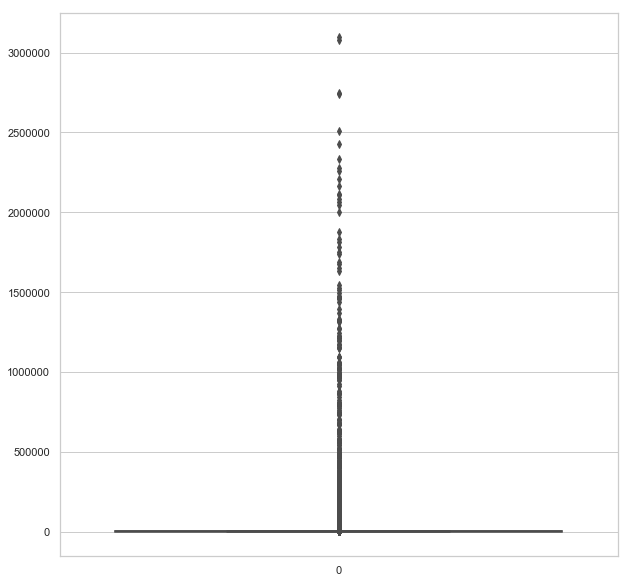

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (15,15))
sns.boxplot(data=citi_data['tripduration'])
fig=plt.gcf()
fig.set_size_inches(10,10)


Notice, how we have some very high values for trip duration and some very low values for trip duration. 

**--->For our understanding: High values maybe seen, when someone did not dock their bike. Low values, because someone undocked the bike - did not use it and docked it back.**

**---> As part of cleaning, as a team, do we want to get rid of the extremely high values and extremely low values? - Let's discuss**

Monday       245115
Tuesday      269825
Wednesday    346636
Thursday     354158
Friday       326634
Saturday     209770
Sunday       225039
Name: Start_Dayofweek, dtype: int64


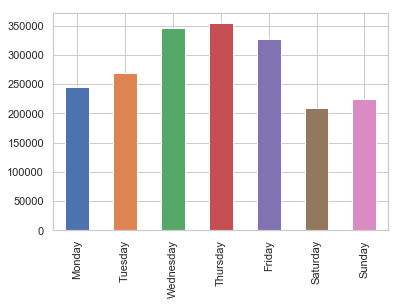

In [16]:
#high_origin_dest = citi_data.groupby(['origin']).size()
#high_origin_dest
#citi_data.dayofweek
#reindex(DAYS, fill_value=0).plot.bar()
#x=citi_data.groupby(citi_data['dayofweek']).count()
#plt.hist(x)
#counting the no of week days:
#crashes_by_day = citi_data['dayofweek']
#crashes_by_day.plot(kind='barh')
#plt.plot(np.sort(crashes_by_day))
#print(crashes_by_day)



#counting the no of week days:
DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_of_rides_weekly=citi_data.Start_Dayofweek.value_counts().reindex(DAYS, fill_value=0)
count_of_rides_weekly.plot(kind='bar')
print(count_of_rides_weekly)

It appears from the above graph, that, The peak usage of Citi bike is Wednesday, Thursday and Friday. Let us also take a look at subscriber/customer usage pattern over the week (counts by day).

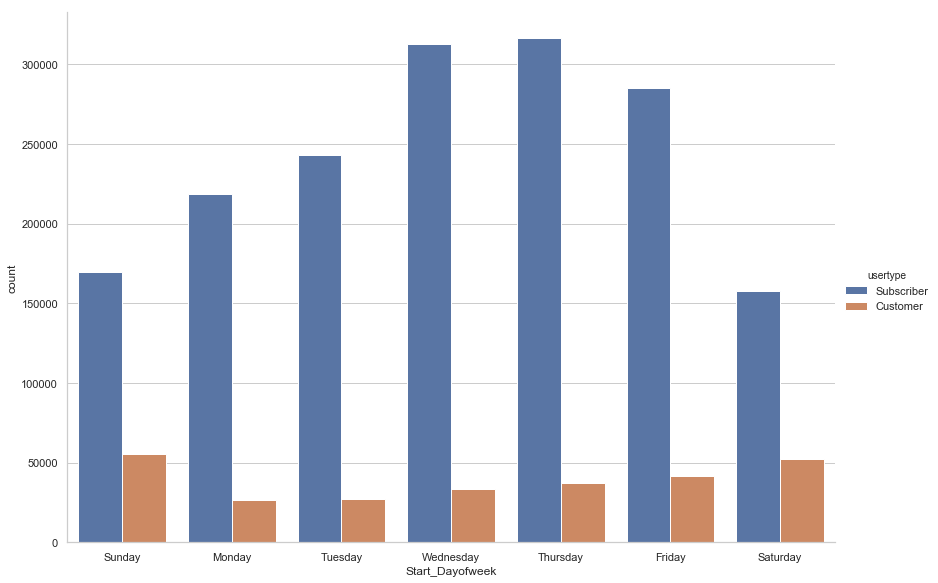

In [17]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
g = sns.catplot("Start_Dayofweek", 
                 hue="usertype",
                 data=citi_data, kind="count",order = order, height=8.27, aspect=11.7/8.27);


As we can see from the above plots, the patterns of usage are different - Customer usage during the weekdays are clearly much lower than their usage in the weekend. 

We do imagine New York has visitors over the weekend and we can henceforth see that pattern here as well. 

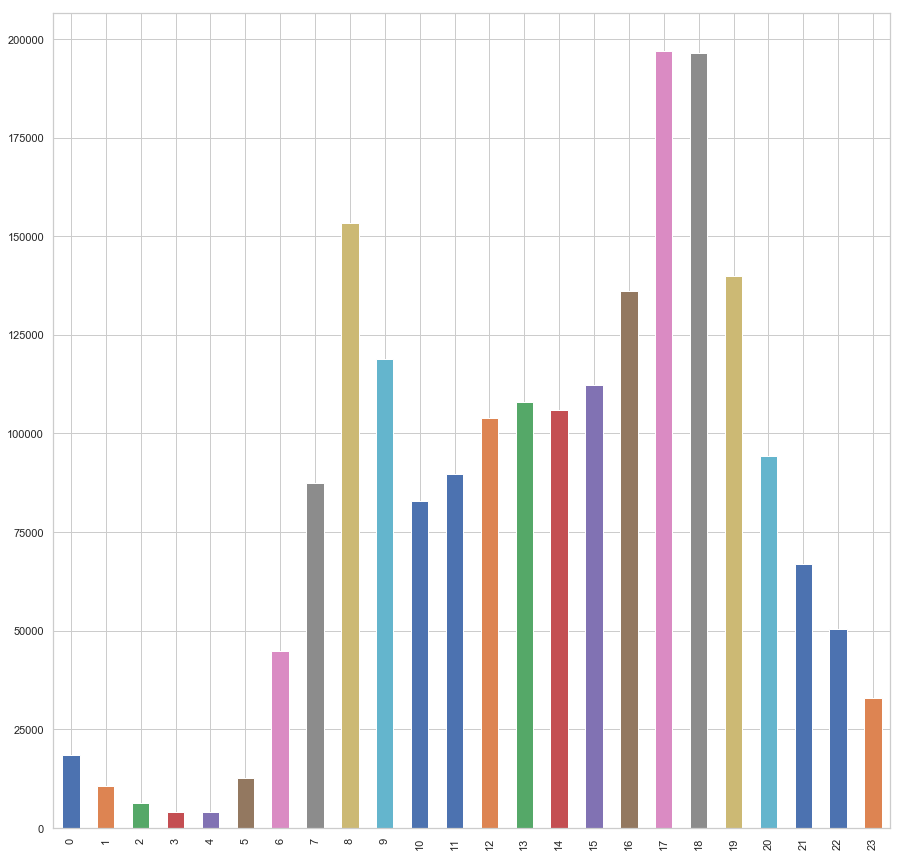

In [18]:
#Counting riders hourly
day=range(0,24)
count_of_rides_hourly = citi_data['Start_hour'].value_counts().reindex(day, fill_value=0)
plt.figure(figsize = (15,15))
count_of_rides_hourly.plot(kind='bar')
#print(count_of_rides_hourly)

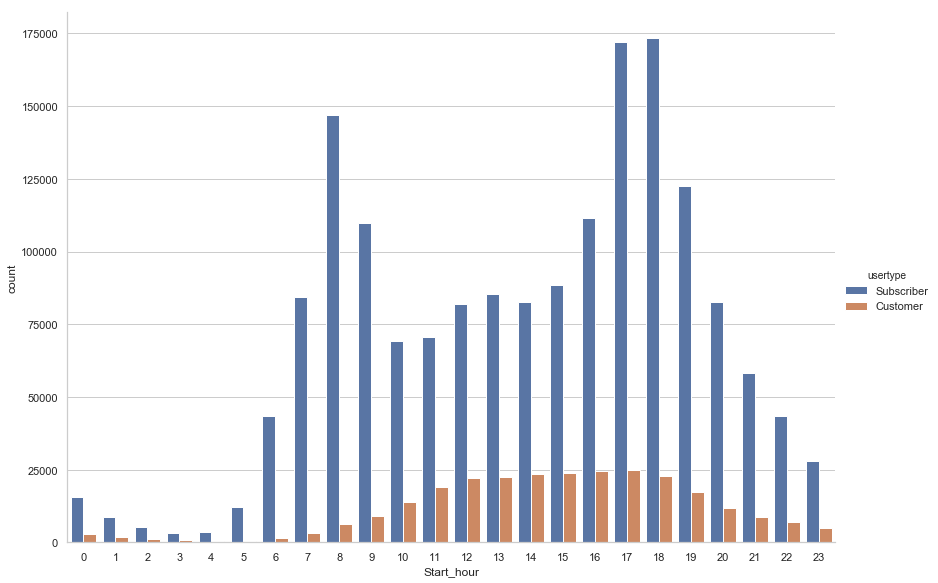

In [19]:
#Counting riders hourly
hour = range(0,24)

g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data, kind="count",order = hour, height=8.27, aspect=11.7/8.27);



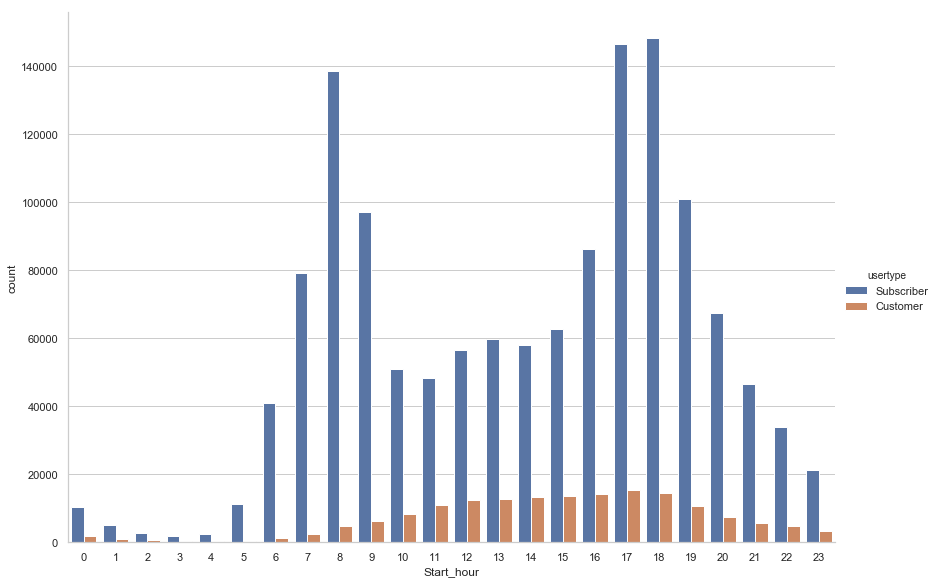

In [20]:
#Counting riders hourly weekday analysis
hour = range(0,24)
weekday = ["Monday","Tuesday","Wednesday","Thursday","Friday"]



g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data.loc[citi_data['Start_Dayofweek'].isin(weekday)], kind="count",order = hour, height=8.27, aspect=11.7/8.27);




We can see a pattern of usage for subscribers on weekdays - peaking at about and around 8 am and 5-6 pm. Whereas there seems to be a similar pattern of usage by "Customer" usertype - high usage starting 10-11 am until 6-7 pm on the weekdays.

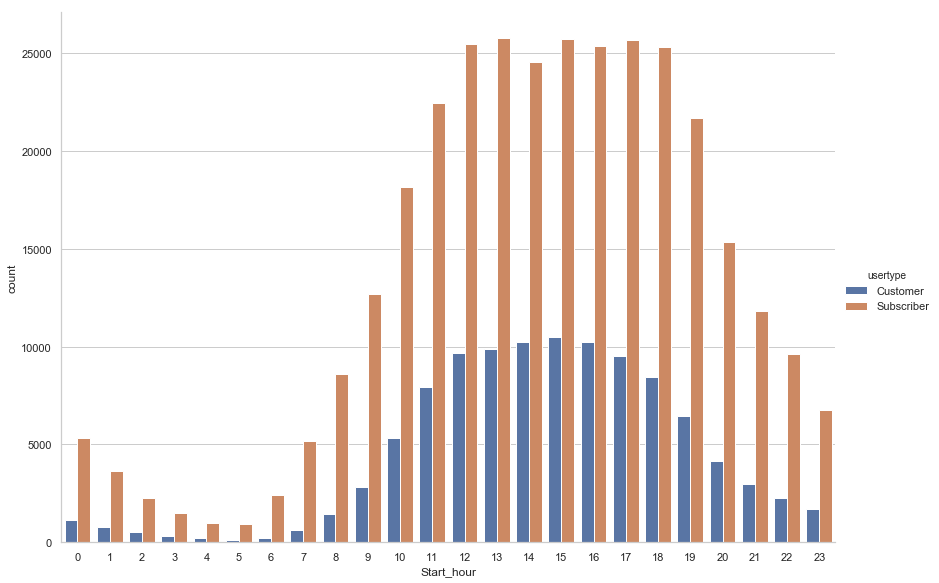

In [21]:
#Counting riders hourly weekday analysis
hour = range(0,24)
weekend = ["Saturday","Sunday"]

g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data.loc[citi_data['Start_Dayofweek'].isin(weekend)], 
                kind="count",order = hour, height=8.27, aspect=11.7/8.27);




The patterns for Weekends are clear from the above plot - For both categories, subscriber and customer, there seems to be high demand between 10 am and 7 pm. Some Subscribers also seem to be touring around New York on weekends. 

Let's try to see the most frequent origin destination pairs.

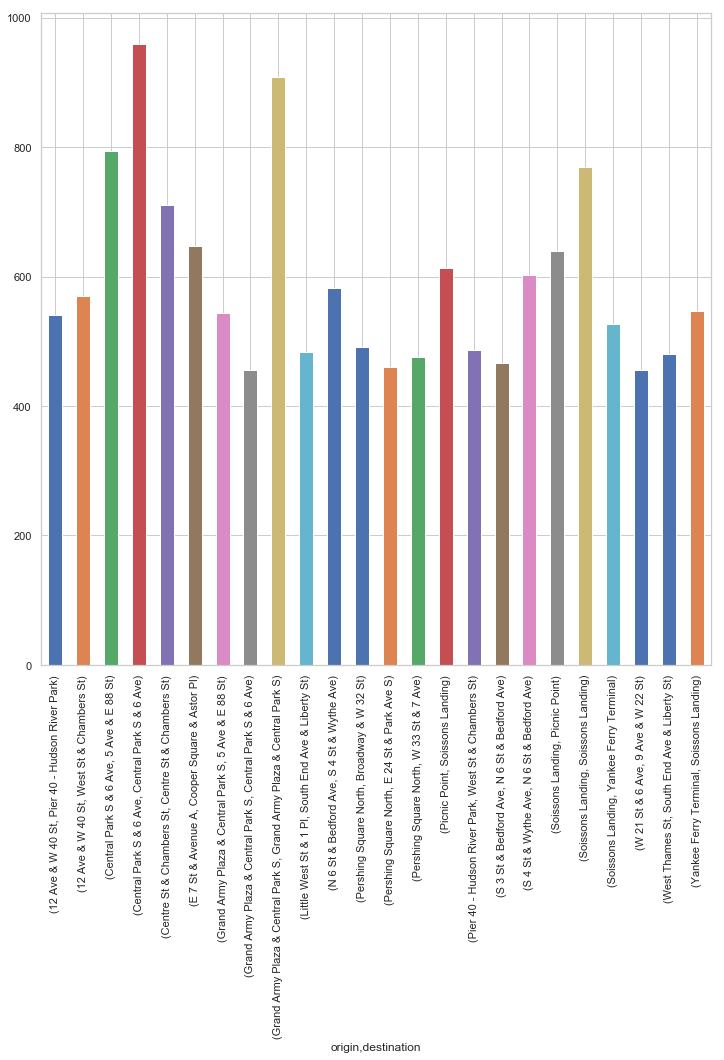

In [22]:
high_origin_dest = citi_data.groupby(['origin','destination']).size()
#print(high_origin_dest)
top_origin_dest = high_origin_dest[high_origin_dest>450]
#print(top_origin_dest)

plt.figure(figsize=(12,12))
top_origin_dest.plot(kind='bar')

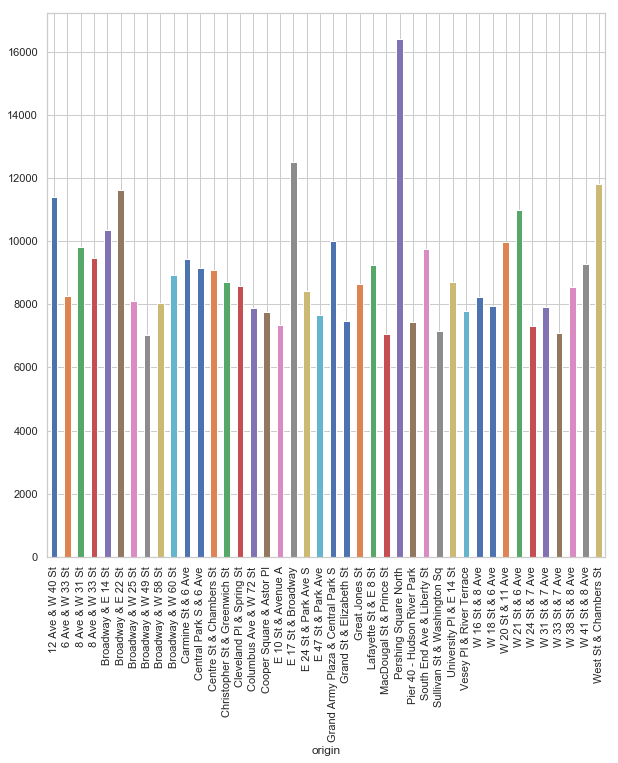

In [23]:
high_origin = citi_data.groupby(['origin']).size()
#print(high_origin)

top_origin = high_origin[high_origin>7000]
#print(top_origin_dest)

plt.figure(figsize=(10,10))
top_origin.plot(kind='bar' )


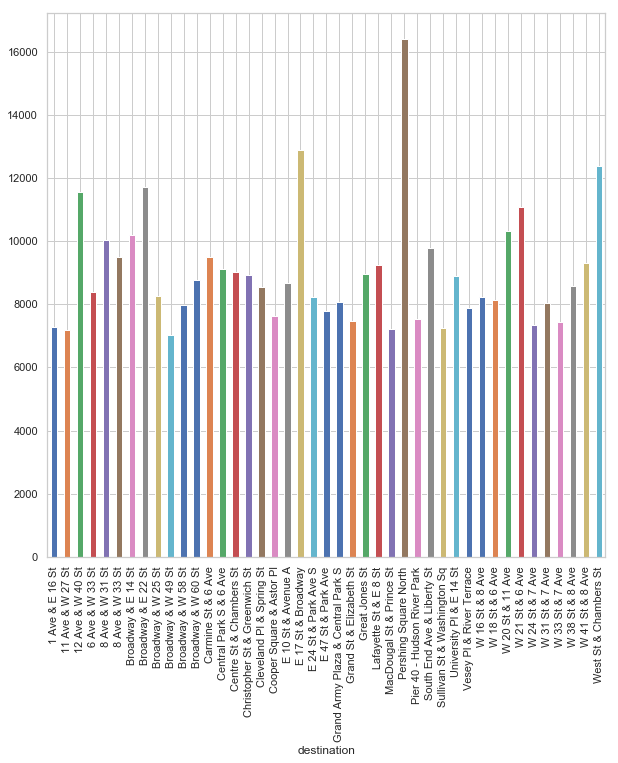

In [24]:
high_dest = citi_data.groupby(['destination']).size()
#print(high_origin)

top_dest = high_dest[high_dest>7000]
#print(top_origin_dest)

plt.figure(figsize=(10,10))
top_dest.plot(kind='bar' )

In [25]:
types_users = citi_data['usertype'].value_counts()

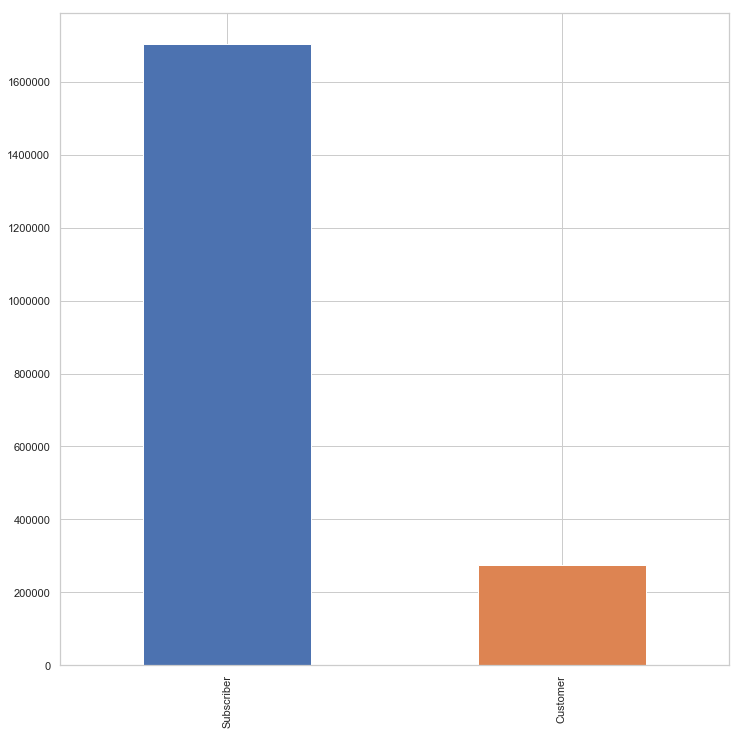

In [26]:
plt.figure(figsize=(12,12))
types_users.plot(kind='bar')

In [27]:
#to find unique gender
citi_data.gender.unique()

array([1, 0, 2])

In [28]:
gender_users = citi_data['gender'].value_counts()
gender_users
#plt.figure(figsize=(12,12))
#gender_users.plot(kind='bar')

1    1296312
2     475485
0     205380
Name: gender, dtype: int64

10% of the gender values are unknown - 0 value Let's drop these values as our further analysis requires gender values for speed analysis. 

In [29]:
citi_data.shape

(1977177, 31)

In [30]:
citi_data.drop(citi_data[citi_data.gender == 0].index,inplace=True)
citi_data.shape

(1771797, 31)

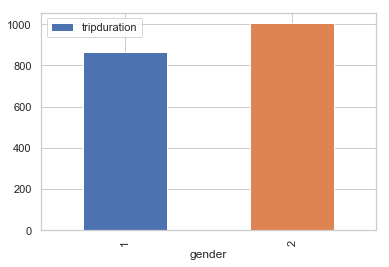

In [31]:
mean_trip_gender = citi_data.groupby('gender', as_index=False)['tripduration'].mean()
mean_trip_gender.plot(x='gender',y='tripduration',kind='bar')

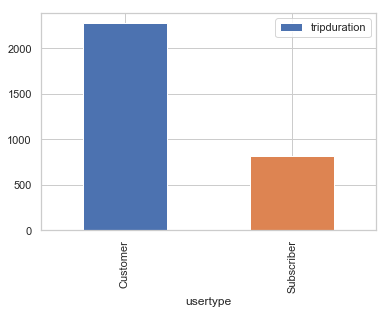

In [32]:
mean_trip_usertype = citi_data.groupby('usertype', as_index = False)['tripduration'].mean()
mean_trip_usertype.plot(x='usertype',y='tripduration',kind='bar')

Calculating age:

In [33]:
citi_data['age'] = 2018 - citi_data['birth_year'].astype(int)
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Minute,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,0,31,2,0,Wednesday,1,11,31,2,32
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,0,31,2,0,Wednesday,1,10,31,2,49
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,0,31,2,0,Wednesday,1,22,31,2,48
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,0,31,2,0,Wednesday,1,4,31,2,36
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,0,31,2,0,Wednesday,1,7,31,2,31


In [34]:
old_people = citi_data.age[citi_data.age>70]
old_people.count()

11009

In [35]:
citi_data.drop(citi_data[citi_data.age >70].index,inplace=True)
citi_data.shape

(1760788, 32)

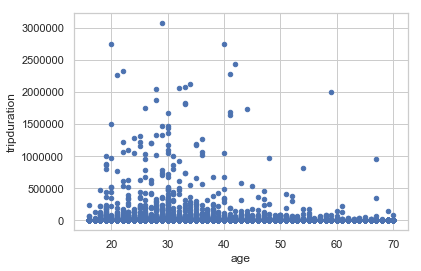

In [36]:
citi_data.plot.scatter('age','tripduration')

In [37]:
from geopy.distance import vincenty
from geopy.distance import great_circle

#newport_ri = (41.49008, -71.312796)
#cleveland_oh = (41.499498, -81.695391)
#print(geodesic(newport_ri, cleveland_oh).miles)
#538.390445368
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371/1.609 # miles
#Earth radius is the approximate distance from Earth's center to its surface, about 6,371 km (3,959 mi).
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
       * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

#print(distance(citi_data.iloc[1][['origin_latitude','origin_longitude']],citi_data.iloc[1][['dest_latitude','dest_longitude']]))
#print(great_circle(citi_data.iloc[1][['origin_latitude','origin_longitude']],citi_data.iloc[1][['dest_latitude','dest_longitude']]).miles)
from haversine import haversine
dist = []
for i in range(len(citi_data)):
    dist.append(haversine((citi_data['origin_latitude'][i], citi_data['origin_longitude'][i]), (citi_data['dest_latitude'][i], citi_data['dest_longitude'][i])))


#    dist.append(great_circle(citi_data.iloc[i][['origin_latitude','origin_longitude']],citi_data.iloc[i][['dest_latitude','dest_longitude']]).miles)
    






In [38]:
citi_data['Distance'] = dist


In [39]:
#Converting tripduration to minutes

#citi_data['tripduration'] = pd.to_datetime(citi_data['tripduration'], unit='m')
#citi_data['tripduration'] = pd.to_datetime(citi_data['tripduration'],format).apply(lambda x: x.time())


In [40]:
#Dropping the roundtrip
citi_data = citi_data.drop(citi_data.index[(citi_data['Distance'] == 0)])

In [41]:
citi_data

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,31,2,0,Wednesday,1,11,31,2,32,2.594850
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,31,2,0,Wednesday,1,10,31,2,49,2.164037
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,31,2,0,Wednesday,1,22,31,2,48,1.058240
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,31,2,0,Wednesday,1,4,31,2,36,0.595883
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,31,2,0,Wednesday,1,7,31,2,31,1.096288
6,172,2018-08-01 00:01:03.534,2018-08-01 00:03:55.874,515.0,W 43 St & 10 Ave,40.760094,-73.994618,529.0,W 42 St & 8 Ave,40.757570,...,31,2,0,Wednesday,1,3,31,2,43,0.415269
7,1133,2018-08-01 00:01:04.024,2018-08-01 00:19:57.243,265.0,Stanton St & Chrystie St,40.722293,-73.991475,3641.0,Broadway & W 25 St,40.742869,...,31,2,0,Wednesday,1,19,31,2,21,2.295989
8,1417,2018-08-01 00:01:18.095,2018-08-01 00:24:55.445,472.0,E 32 St & Park Ave,40.745712,-73.981948,351.0,Front St & Maiden Ln,40.705310,...,31,2,0,Wednesday,1,24,31,2,24,4.932964
9,195,2018-08-01 00:01:19.609,2018-08-01 00:04:35.416,3151.0,E 81 St & York Ave,40.772838,-73.949892,3156.0,E 72 St & York Ave,40.766638,...,31,2,0,Wednesday,1,4,31,2,25,0.752832
10,1093,2018-08-01 00:01:21.535,2018-08-01 00:19:35.367,432.0,E 7 St & Avenue A,40.726218,-73.983799,3070.0,McKibbin St & Manhattan Ave,40.705109,...,31,2,0,Wednesday,1,19,31,2,29,4.088914


In [42]:
#Dropping the records where the start station is same as the end station
#citi_data = citi_data.drop (citi_data['origin_latitude'] == citi_data['dest_latitude'])

In [43]:
#Add Minutes column for Trip Duration
citi_data['Minutes'] = citi_data['tripduration']/60
#For Visual purposes, rounded
citi_data['Minutes'] = round(citi_data['Minutes'])
citi_data['Minutes'] = citi_data['Minutes'].astype(int)

In [44]:
citi_data['min_mile'] = round(citi_data['Minutes']/citi_data['Distance'], 2)
citi_data['mile_hour'] = round(citi_data['Distance']/(citi_data['Minutes']/60),2)

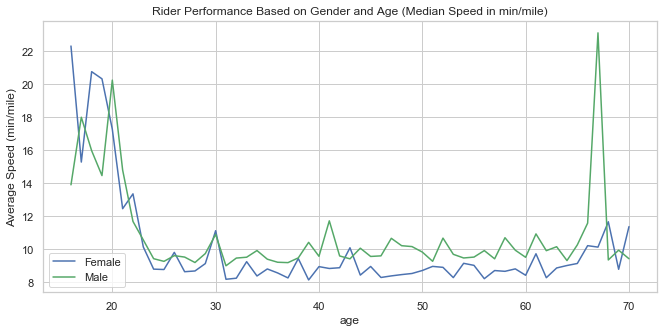

In [45]:
#Rider performance by age and Gender in Min/Mile 
fig, ax5 = plt.subplots(figsize=(11,5))
citi_data.groupby(['age','gender']).mean()['min_mile'].unstack().plot(ax=ax5, color ="bg")
ax5.legend(['Female','Male'])
plt.ylabel('Average Speed (min/mile)')
plt.title('Rider Performance Based on Gender and Age (Median Speed in min/mile)')
plt.show()

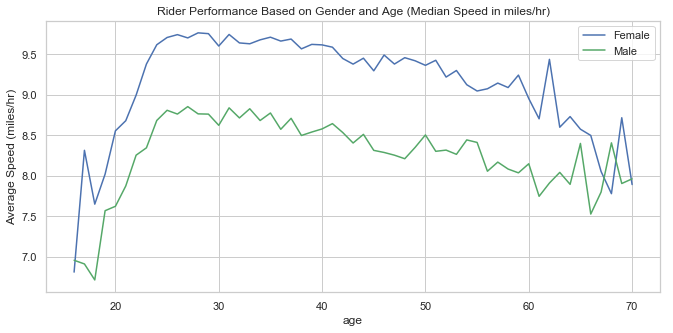

In [46]:
#Rider performance by age and Gender in Miles/hr
del([fig,ax5])
fig1, ax6 = plt.subplots(figsize=(11,5))
citi_data.groupby(['age','gender']).mean()['mile_hour'].unstack().plot(ax=ax6,color ="bg")
ax6.legend(['Female', 'Male'])
plt.ylabel('Average Speed (miles/hr)')
plt.title('Rider Performance Based on Gender and Age (Median Speed in miles/hr)')
plt.show()

In [47]:
#Dropping timestamp data
del citi_data['starttime']
del citi_data['stoptime']
del citi_data['origin_id']
del citi_data['dest_id']
del citi_data['origin_latitude']
del citi_data['origin_longitude']
del citi_data['dest_latitude']
del citi_data['dest_longitude']

In [48]:
citi_data.isnull().any()

tripduration       False
origin              True
destination         True
bikeid             False
usertype           False
birth_year         False
gender             False
start_date         False
start_time         False
stop_date          False
stop_time          False
Start_hour         False
Start_Dayofweek    False
Start_Day          False
Start_Minute       False
Start_Week         False
Start_weekday      False
Stop_hour          False
Stop_Dayofweek     False
Stop_Day           False
Stop_Minute        False
Stop_Week          False
Stop_weekday       False
age                False
Distance           False
Minutes            False
min_mile           False
mile_hour          False
dtype: bool

In [49]:
citi_data.dropna()

,tripduration,origin,destination,bikeid,usertype,birth_year,gender,start_date,start_time,stop_date,...,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance,Minutes,min_mile,mile_hour
0,681,W 78 St & Broadway,Cathedral Pkwy & Broadway,27770,Subscriber,1986,1,2018-08-01,00:00:07.321000,2018-08-01,...,Wednesday,1,11,31,2,32,2.594850,11,4.24,14.15
1,625,Mercer St & Bleecker St,E 27 St & 1 Ave,25938,Subscriber,1969,1,2018-08-01,00:00:19.748000,2018-08-01,...,Wednesday,1,10,31,2,49,2.164037,10,4.62,12.98
2,1319,E 2 St & 2 Ave,Broadway & E 14 St,28679,Subscriber,1970,1,2018-08-01,00:00:21.175000,2018-08-01,...,Wednesday,1,22,31,2,48,1.058240,22,20.79,2.89
3,220,Fulton St & Waverly Ave,Lafayette Ave & St James Pl,28075,Subscriber,1982,1,2018-08-01,00:00:26.470000,2018-08-01,...,Wednesday,1,4,31,2,36,0.595883,4,6.71,8.94
4,398,31 Ave & Steinway St,31 St & Hoyt Ave N,25002,Subscriber,1987,1,2018-08-01,00:00:30.291000,2018-08-01,...,Wednesday,1,7,31,2,31,1.096288,7,6.39,9.40
6,172,W 43 St & 10 Ave,W 42 St & 8 Ave,31108,Subscriber,1975,1,2018-08-01,00:01:03.534000,2018-08-01,...,Wednesday,1,3,31,2,43,0.415269,3,7.22,8.31
7,1133,Stanton St & Chrystie St,Broadway & W 25 St,28715,Subscriber,1997,1,2018-08-01,00:01:04.024000,2018-08-01,...,Wednesday,1,19,31,2,21,2.295989,19,8.28,7.25
8,1417,E 32 St & Park Ave,Front St & Maiden Ln,26991,Subscriber,1994,1,2018-08-01,00:01:18.095000,2018-08-01,...,Wednesday,1,24,31,2,24,4.932964,24,4.87,12.33
9,195,E 81 St & York Ave,E 72 St & York Ave,24969,Subscriber,1993,1,2018-08-01,00:01:19.609000,2018-08-01,...,Wednesday,1,4,31,2,25,0.752832,3,3.98,15.06
10,1093,E 7 St & Avenue A,McKibbin St & Manhattan Ave,29398,Customer,1989,1,2018-08-01,00:01:21.535000,2018-08-01,...,Wednesday,1,19,31,2,29,4.088914,18,4.40,13.63


In [50]:
del citi_data['origin']
del citi_data['destination']

In [51]:
del citi_data['bikeid']
del citi_data['usertype']

In [52]:
del citi_data['birth_year']

In [53]:
del citi_data['start_time']
del citi_data['stop_time']

In [54]:
del citi_data['tripduration']

In [55]:
citi_data['Distance'] = citi_data['Distance'].astype(int)
citi_data['min_mile'] = citi_data['min_mile'].astype(int)
citi_data['mile_hour'] = citi_data['mile_hour'].astype(int)

In [56]:
citi_data

,gender,start_date,stop_date,Start_hour,Start_Dayofweek,Start_Day,Start_Minute,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance,Minutes,min_mile,mile_hour
0,1,2018-08-01,2018-08-01,0,Wednesday,1,0,31,2,0,Wednesday,1,11,31,2,32,2,11,4,14
1,1,2018-08-01,2018-08-01,0,Wednesday,1,0,31,2,0,Wednesday,1,10,31,2,49,2,10,4,12
2,1,2018-08-01,2018-08-01,0,Wednesday,1,0,31,2,0,Wednesday,1,22,31,2,48,1,22,20,2
3,1,2018-08-01,2018-08-01,0,Wednesday,1,0,31,2,0,Wednesday,1,4,31,2,36,0,4,6,8
4,1,2018-08-01,2018-08-01,0,Wednesday,1,0,31,2,0,Wednesday,1,7,31,2,31,1,7,6,9
6,1,2018-08-01,2018-08-01,0,Wednesday,1,1,31,2,0,Wednesday,1,3,31,2,43,0,3,7,8
7,1,2018-08-01,2018-08-01,0,Wednesday,1,1,31,2,0,Wednesday,1,19,31,2,21,2,19,8,7
8,1,2018-08-01,2018-08-01,0,Wednesday,1,1,31,2,0,Wednesday,1,24,31,2,24,4,24,4,12
9,1,2018-08-01,2018-08-01,0,Wednesday,1,1,31,2,0,Wednesday,1,4,31,2,25,0,3,3,15
10,1,2018-08-01,2018-08-01,0,Wednesday,1,1,31,2,0,Wednesday,1,19,31,2,29,4,18,4,13


In [57]:
#Shifting the gender column to the end and changing male (1) to 0 and female from 2 to 1
df1 = citi_data.pop('gender')
citi_data['gender']=df1
citi_data['gender'].replace([1,2],[0,1],inplace=True)
citi_data

,start_date,stop_date,Start_hour,Start_Dayofweek,Start_Day,Start_Minute,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance,Minutes,min_mile,mile_hour,gender
0,2018-08-01,2018-08-01,0,Wednesday,1,0,31,2,0,Wednesday,1,11,31,2,32,2,11,4,14,0
1,2018-08-01,2018-08-01,0,Wednesday,1,0,31,2,0,Wednesday,1,10,31,2,49,2,10,4,12,0
2,2018-08-01,2018-08-01,0,Wednesday,1,0,31,2,0,Wednesday,1,22,31,2,48,1,22,20,2,0
3,2018-08-01,2018-08-01,0,Wednesday,1,0,31,2,0,Wednesday,1,4,31,2,36,0,4,6,8,0
4,2018-08-01,2018-08-01,0,Wednesday,1,0,31,2,0,Wednesday,1,7,31,2,31,1,7,6,9,0
6,2018-08-01,2018-08-01,0,Wednesday,1,1,31,2,0,Wednesday,1,3,31,2,43,0,3,7,8,0
7,2018-08-01,2018-08-01,0,Wednesday,1,1,31,2,0,Wednesday,1,19,31,2,21,2,19,8,7,0
8,2018-08-01,2018-08-01,0,Wednesday,1,1,31,2,0,Wednesday,1,24,31,2,24,4,24,4,12,0
9,2018-08-01,2018-08-01,0,Wednesday,1,1,31,2,0,Wednesday,1,4,31,2,25,0,3,3,15,0
10,2018-08-01,2018-08-01,0,Wednesday,1,1,31,2,0,Wednesday,1,19,31,2,29,4,18,4,13,0


In [58]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#citi_data = citi_data.apply(le.fit_transform(citi_data.astype(str)))
#citi_data.head()
#df[cat] = le.fit_transform(df[cat].astype(str))
for column in citi_data.columns:
    if citi_data[column].dtype == type(object):
        le = LabelEncoder()
        citi_data[column] = le.fit_transform(citi_data[column].astype(str))

In [59]:
X = citi_data.iloc[:-10000,:-1]
test_X = citi_data.iloc[-10000:,:-1]
print(len(X), len(test_X))

1717768 10000


In [60]:
y = citi_data.iloc[:-10000,-1:]
test_y = citi_data.iloc[-10000:,-1:]
print(len(y),len(test_y))

1717768 10000


In [61]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1288326, 19) (429442, 19) (1288326, 1) (429442, 1)


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,random_state=2)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, y, cv=kf)
print(results.mean()*100)

61.188239463847125


In [63]:
#test_X.info()

In [64]:
model.fit(X_train, y_train)
prediction = model.predict(test_X)
p_gender = (prediction==test_y['gender']).value_counts()
p_gender


True     6068
False    3932
Name: gender, dtype: int64

In [65]:
print('Accuracy on Unseen data %f' %(p_gender[1]/10000*100)+' %')

Accuracy on Unseen data 60.680000 %


In [66]:
y_true = np.ravel(test_y).copy()
y_pred = model.predict(test_X)

In [67]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_true, y_pred)

In [68]:
print('AUC Score = %.2f' %(auc*100)+'')

AUC Score = 52.22


We should now be interested in bringing dates and times into the picture as well!

  What is the question?
 * If Citi bike as a company were to expand in order to manage high traffic areas - what locations would they consider adding more docks or resources?
 * Can they have dockless stations between high demand stations at peak travel times and high traffic locations?
 * How can they improve services for their customers on weekday v/s weekend based on traffic and usage?
 * Regress to a predicted value of number of bikes needed in high demand areas? 
 
Why should anyone care?
* Primarily, helps **Citi Bike** as a company to get perspective as to how they can improve their services and generate more revenue.
* These insights can also help regular **Citi Bike users**.

Team Members:

1. Nikita Reddy
2. Akash Gangrade
3. Rajesh Narasimha Reddy
4. Sneha Mani